In [0]:
!pip install plot_metric
!pip install catboost
from catboost import CatBoostClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import xgboost as xgb
from plot_metric.functions import BinaryClassification
!pip install category_encoders
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import base
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
from IPython.display import Image
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")

# Will it rain tomorrow?


### In this project, we tried to predict whether it will rain tomorrow. It is a classification project. There is a Yes or No class.  Yes, it will rain tomorrow. If No, it will not rain tomorrow. In this project,Rain in Tomorrow dataset was used.

### Since our target variable is categorical, we will use these models. These can be listed as follows:


1.   XGboost Classifier
2.   Light-GBM Classifier
1.   CatBoost Classifier
2.   GradientBoosting Classifier
1.   Logistic Regression









## Content
### This dataset contains daily weather observations from numerous Australian weather stations such as Rainfall, Wind and Humidity.
### The following steps were followed in this project:

1.   Exploratory data analysis
2.   Visualization
2.   Split data into training and test set
2.   Feature Engineering
1.   Modelling
1.   Feature Importance
1.   Predict results




# 1. Exploratory data analysis

## Import Data

In [0]:
url = "https://drive.google.com/uc?id=1VbA1GgviqmzGBd5bN_nsWEymS4zU7LoE"

data = pd.read_csv(url)

## Data Analysis


In [0]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [0]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows-

In [0]:
data.drop('RISK_MM', axis=1 ,inplace=True)

### Target content changed to 1-0.

In [0]:
data.RainTomorrow = [0 if each=='No' else 1 for each in data.RainTomorrow]

### The date was divided into days, months, years.

In [0]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date', axis=1 ,inplace=True)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0,2017,6,20
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0,2017,6,21
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0,2017,6,22
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0,2017,6,23


### Number and rate of Target Variables

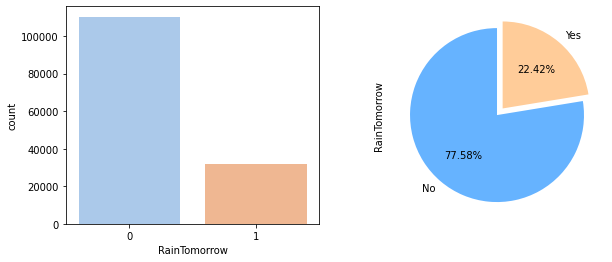

In [0]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels=['No', 'Yes']
sns.countplot(x=data.RainTomorrow, data=data, palette="pastel",ax=ax[0])
data['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

In [0]:
rain_no = data[data['RainTomorrow']== 0]
rain_yes = data[data['RainTomorrow']== 1]

fig = go.Figure([go.Bar(x=['Rain-Yes', 'Rain-No'], y=[len(rain_yes),len(rain_no)], marker_color='lightsalmon')])
fig.update_layout(title_text='Is Rain Tomorrow')
fig.show()

![](https://cdn.discordapp.com/attachments/703002285994672192/715889102012022835/rain_yes_no.png)


## Information about Missing values.

### Showing missing values

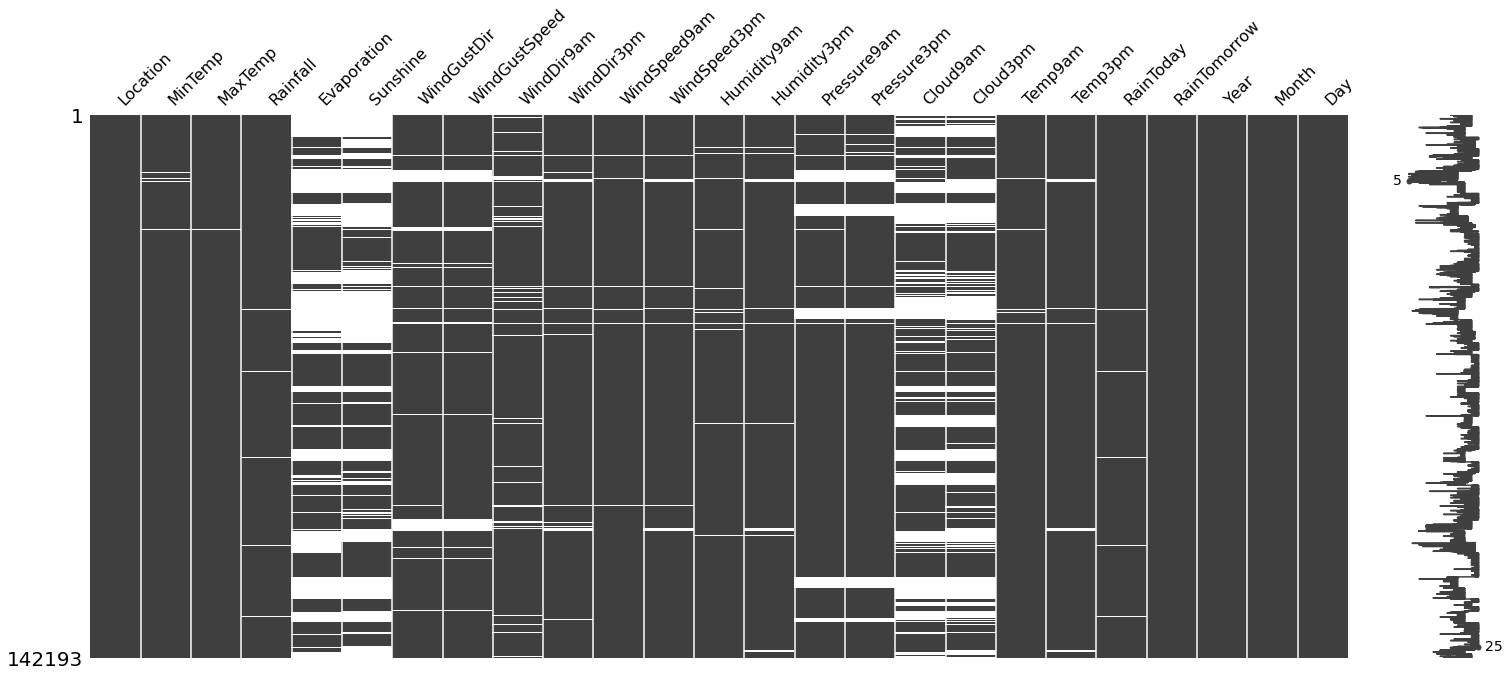

In [0]:
msno.matrix(data)
plt.show()

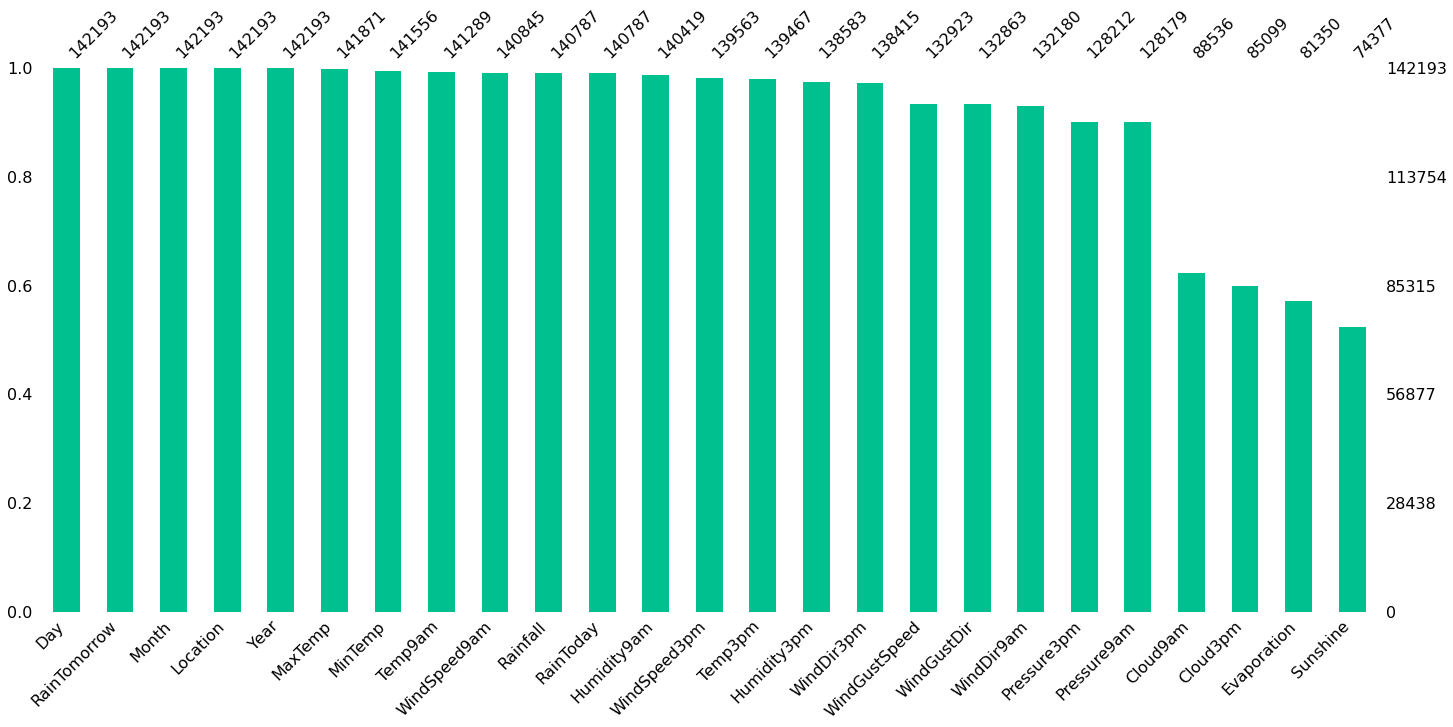

In [0]:
msno.bar(data,sort='descending',color='#00c090')
plt.show()

## Representation of missing values, unique values, etc.

In [0]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)

In [0]:
data_info=Missing_Values(data)
data_info

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
5,Sunshine,142193,67816,0.477,float64,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ...",146
4,Evaporation,142193,60843,0.428,float64,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0...",357
17,Cloud3pm,142193,57094,0.402,float64,"[nan, 2.0, 8.0, 7.0, 1.0, 5.0, 4.0, 6.0, 3.0, ...",11
16,Cloud9am,142193,53657,0.377,float64,"[8.0, nan, 7.0, 1.0, 0.0, 5.0, 4.0, 2.0, 6.0, ...",11
14,Pressure9am,142193,14014,0.099,float64,"[1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009....",547
15,Pressure3pm,142193,13981,0.098,float64,"[1007.1, 1007.8, 1008.7, 1012.8, 1006.0, 1005....",550
8,WindDir9am,142193,10013,0.070,object,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,...",17
6,WindGustDir,142193,9330,0.066,object,"[W, WNW, WSW, NE, NNW, N, NNE, SW, ENE, SSE, S...",17
7,WindGustSpeed,142193,9270,0.065,float64,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80....",68
9,WindDir3pm,142193,3778,0.027,object,"[WNW, WSW, E, NW, W, SSE, ESE, ENE, NNW, SSW, ...",17


## Types of data measurement scales

In [0]:
data_info["Scales_of_measurement"]=["Continuous","Continuous","Ordinal","Ordinal","Continuous",\
"Continuous","Nominal","Nominal","Continuous","Nominal","Continuous","Continuous","Continuous",\
"Continuous","Continuous","Nominal","Continuous","Continuous","Continuous","Continuous","Nominal",\
"Nominal","Nominal","Nominal","Nominal"]

data_info = data_info.set_index("Variable")
data_info

,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value,Scales_of_measurement
Variable,,,,,,,
Sunshine,142193,67816,0.477,float64,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ...",146,Continuous
Evaporation,142193,60843,0.428,float64,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0...",357,Continuous
Cloud3pm,142193,57094,0.402,float64,"[nan, 2.0, 8.0, 7.0, 1.0, 5.0, 4.0, 6.0, 3.0, ...",11,Ordinal
Cloud9am,142193,53657,0.377,float64,"[8.0, nan, 7.0, 1.0, 0.0, 5.0, 4.0, 2.0, 6.0, ...",11,Ordinal
Pressure9am,142193,14014,0.099,float64,"[1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009....",547,Continuous
Pressure3pm,142193,13981,0.098,float64,"[1007.1, 1007.8, 1008.7, 1012.8, 1006.0, 1005....",550,Continuous
WindDir9am,142193,10013,0.070,object,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,...",17,Nominal
WindGustDir,142193,9330,0.066,object,"[W, WNW, WSW, NE, NNW, N, NNE, SW, ENE, SSE, S...",17,Nominal
WindGustSpeed,142193,9270,0.065,float64,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80....",68,Continuous


## Determination of numerical columns.

In [0]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Scales_of_measurement"]=="Continuous")].index)
len(numerical_columns), numerical_columns

(14,
 ['Sunshine',
  'Evaporation',
  'Pressure9am',
  'Pressure3pm',
  'WindGustSpeed',
  'Humidity3pm',
  'Temp3pm',
  'WindSpeed3pm',
  'Humidity9am',
  'Rainfall',
  'WindSpeed9am',
  'Temp9am',
  'MinTemp',
  'MaxTemp'])

## Determination of categorical columns.

In [0]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Scales_of_measurement"]=="Nominal") |
                                       (data_info.loc[:,"Scales_of_measurement"]=="Ordinal")].index)
len(categorical_columns), categorical_columns

(11,
 ['Cloud3pm',
  'Cloud9am',
  'WindDir9am',
  'WindGustDir',
  'WindDir3pm',
  'RainToday',
  'Year',
  'Month',
  'Location',
  'RainTomorrow',
  'Day'])

# 2. Visualization

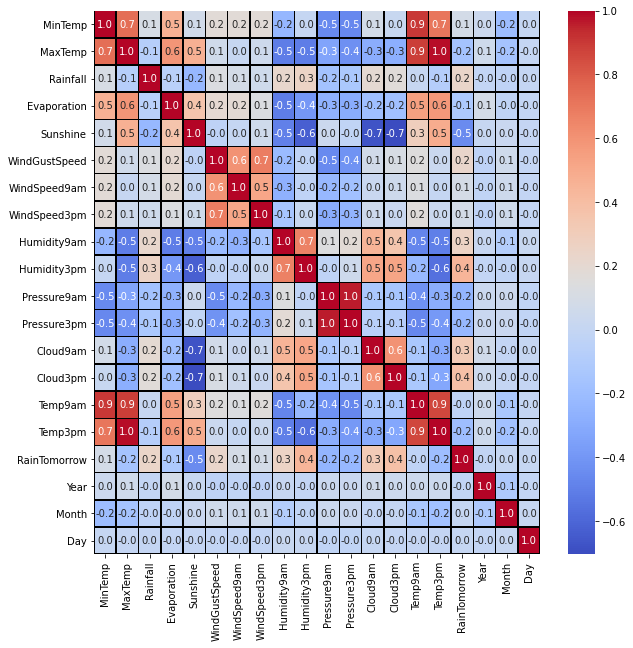

In [0]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.1f',ax=ax,cmap="coolwarm")
plt.show()

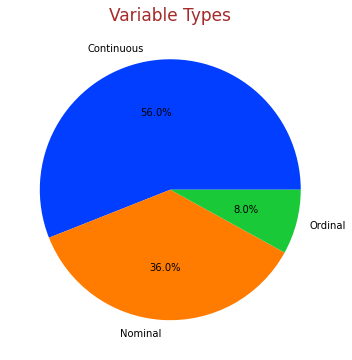

In [0]:
labels = data_info.Scales_of_measurement.value_counts().index
sizes = data_info.Scales_of_measurement.value_counts().values
plt.figure(figsize = (6,6))
plt.pie(sizes,  labels=labels, colors=sns.color_palette('bright'), autopct='%1.1f%%')
plt.title('Variable Types',fontsize = 17,color = 'brown')
plt.show()

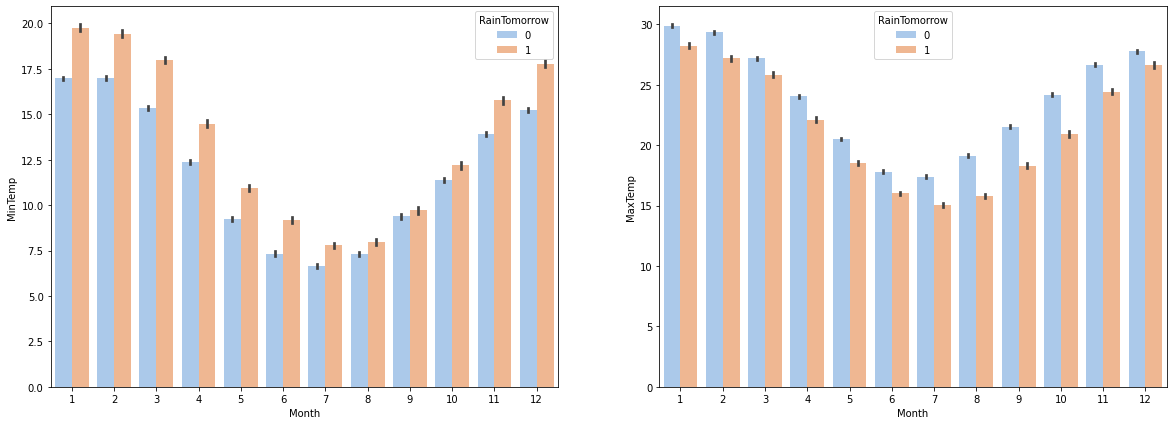

In [0]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(20,7))
sns.barplot(x=data.Month,y=data.MinTemp,hue="RainTomorrow",data=data,ax=ax[0],palette="pastel")
sns.barplot(x=data.Month,y=data.MaxTemp,hue="RainTomorrow",data=data,ax=ax[1],palette="pastel")
plt.show()

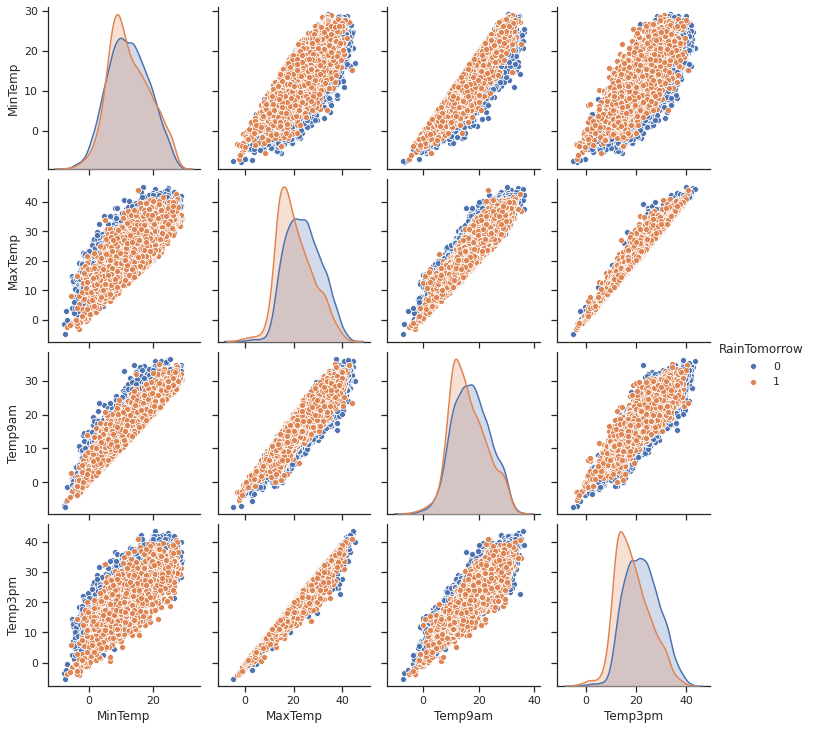

In [0]:
def pairplot(data,lst):
    sns.set(style="ticks")
    sns.pairplot(data[lst],hue="RainTomorrow")
lst=["MinTemp","MaxTemp","Temp9am","Temp3pm","RainTomorrow"]
data_2016=data[data.Year==2016]
pairplot(data_2016,lst)

In [0]:
from plotly.offline import iplot
fig, ax =plt.subplots(nrows=1,ncols=1, figsize=(20,10))
sns.pointplot(x="Year",y="Cloud3pm",data=data,hue="RainToday")
sns.pointplot(x="Year",y="Cloud3pm",data=data,hue="RainTomorrow",color="red")
plt.show()

<center><img src="https://cdn.discordapp.com/attachments/703002285994672192/716037588867088414/rain.png" height=620 width=1000></center>

# 3. Split data into training and test set

In [0]:
x1=data.iloc[:,0:21]
x2=data.iloc[:,22:]
X=pd.concat((x1,x2),axis=1)
Y=data["RainTomorrow"]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [0]:
x_train.shape,y_train.shape

((113754, 24), (113754,))

# 4. Feature Engineering

## Outlier cleaning

### Visualization before outlier

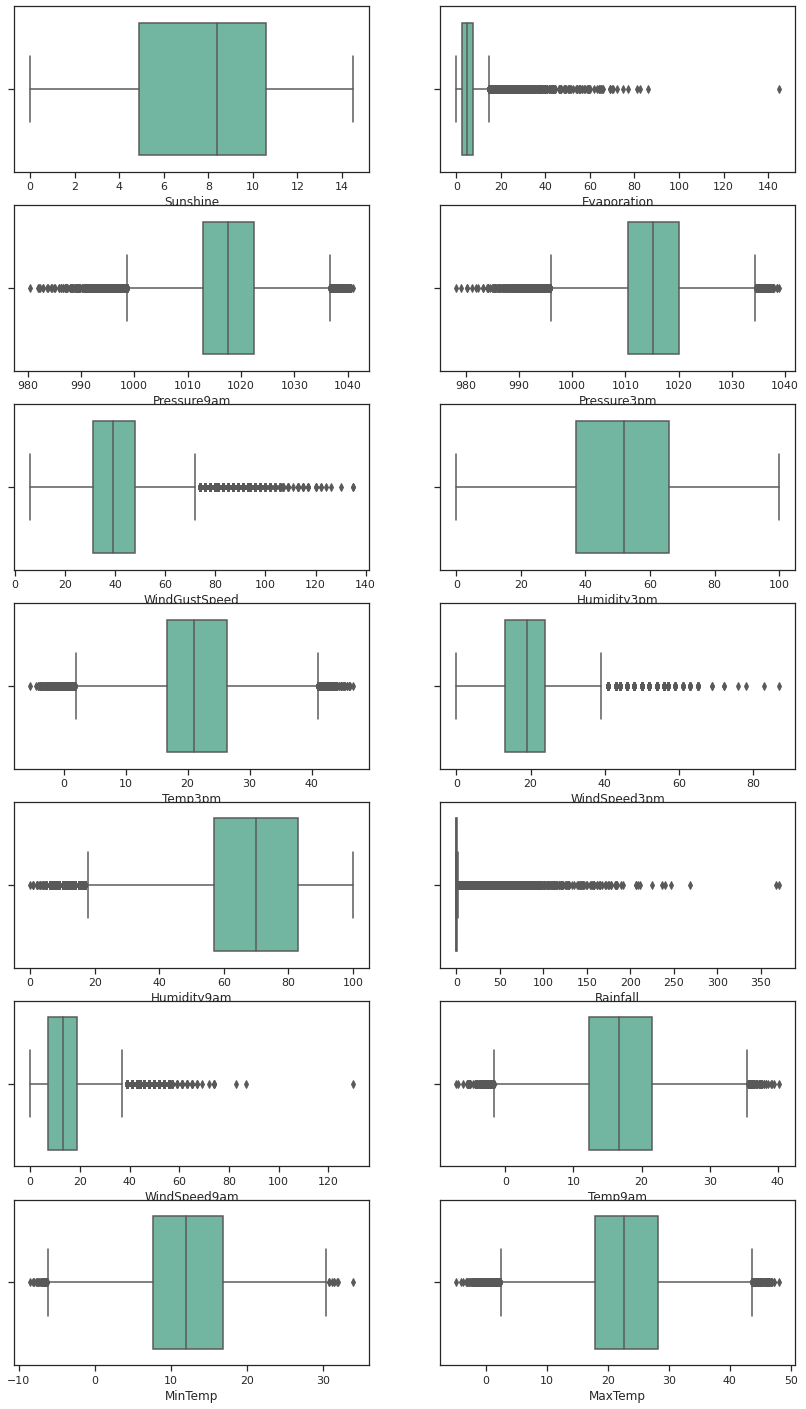

In [0]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=7,ncols=2, figsize=(14,25))
    for i in range(7):
        for j in range(2):
            sns.boxplot(x = df[columns[count]], palette="Set2",ax=ax[i][j])
            count = count+1
boxplot_for_outlier(x_train,numerical_columns)

### Outlier cleaning for Train

In [0]:
lower_and_upper={}
x_train_outlier=x_train.copy()

for col in numerical_columns:
    if(col=="Rainfall"): 
        sparse_value = x_train[col].mode()[0]
        nonsparse_data = pd.DataFrame(x_train[x_train[col] != sparse_value][col])
        q1=nonsparse_data[col].describe()[4]
        q3=nonsparse_data[col].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5*iqr)
        upperbound = q3 + (1.5*iqr)
        lower_and_upper[col]=(lowerbound,upperbound)
        nonsparse_data.loc[(nonsparse_data.loc[:,col]<lowerbound),col] =  lowerbound*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,col]>upperbound),col] =  upperbound*1.25
        x_train_outlier[col][nonsparse_data.index]=nonsparse_data[col]
        
    else:
        q1=x_train_outlier[col].describe()[4]
        q3=x_train_outlier[col].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5 * iqr)
        upperbound = q3 + (1.5 * iqr)
        lower_and_upper[col]=(lowerbound,upperbound)
        number_of_outlier = x_train_outlier.loc[(x_train_outlier.loc[:,col]<lowerbound)\
                                                           | (x_train_outlier.loc[:,col]>upperbound)].shape[0]
        if(number_of_outlier>0):
            print(number_of_outlier," outlier values cleared in" ,col)
            x_train_outlier.loc[(x_train_outlier.loc[:,col]<lowerbound),col] =  lowerbound*0.75
            x_train_outlier.loc[(x_train_outlier.loc[:,col]>upperbound),col] =  upperbound*1.25

1559  outlier values cleared in Evaporation
948  outlier values cleared in Pressure9am
732  outlier values cleared in Pressure3pm
2397  outlier values cleared in WindGustSpeed
597  outlier values cleared in Temp3pm
1946  outlier values cleared in WindSpeed3pm
1126  outlier values cleared in Humidity9am
1370  outlier values cleared in WindSpeed9am
196  outlier values cleared in Temp9am
51  outlier values cleared in MinTemp
381  outlier values cleared in MaxTemp


### Outlier cleaning for Test

In [0]:
x_test_outlier=x_test.copy()

for col in numerical_columns:
    if(col =="Rainfall"):
        sparse_value = x_test[col].mode()[0]
        nonsparse_data = pd.DataFrame(x_test[x_test[col] != sparse_value][col])
        nonsparse_data.loc[(nonsparse_data.loc[:,col]<lower_and_upper[col][0]),col] =  lower_and_upper[col][0]*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,col]>lower_and_upper[col][1]),col] =  lower_and_upper[col][1]*1.25
        x_test_outlier[col][nonsparse_data.index]=nonsparse_data[col]
        
    else:
        
        number_of_outlier_test = x_test_outlier.loc[(x_test_outlier.loc[:,col]<lower_and_upper[col][0]) |\
                                                    (x_test_outlier.loc[:,col]>lower_and_upper[col][1])].shape[0]
        if(number_of_outlier_test>0):
            print(number_of_outlier_test," outlier values cleared in" ,col)
            x_test_outlier.loc[(x_test_outlier.loc[:,col]<lower_and_upper[col][0]),col] =  lower_and_upper[col][0]*0.75
            x_test_outlier.loc[(x_test_outlier.loc[:,col]>lower_and_upper[col][1]),col] =  lower_and_upper[col][1]*1.25

395  outlier values cleared in Evaporation
226  outlier values cleared in Pressure9am
174  outlier values cleared in Pressure3pm
609  outlier values cleared in WindGustSpeed
138  outlier values cleared in Temp3pm
512  outlier values cleared in WindSpeed3pm
293  outlier values cleared in Humidity9am
369  outlier values cleared in WindSpeed9am
51  outlier values cleared in Temp9am
11  outlier values cleared in MinTemp
78  outlier values cleared in MaxTemp


### Visualization after outlier

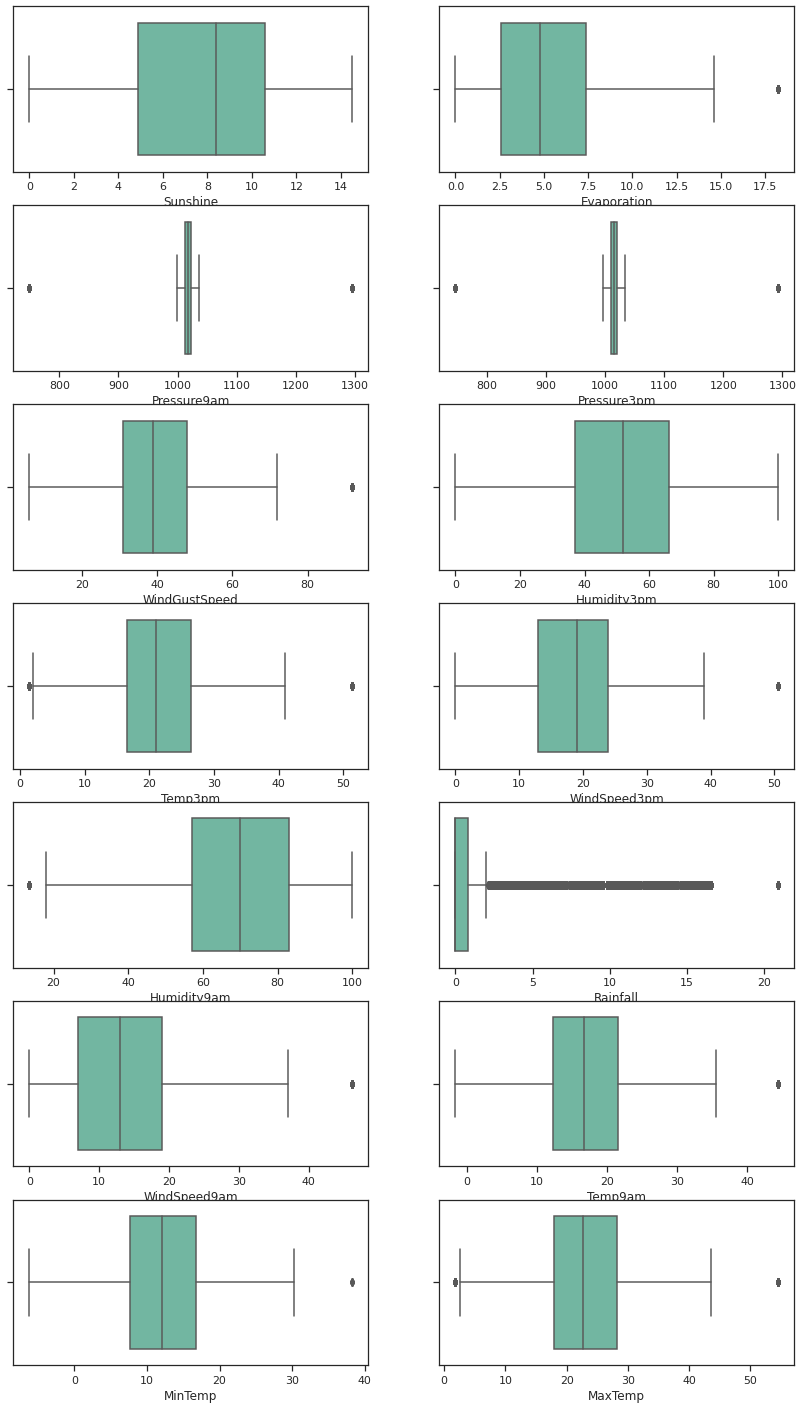

In [0]:
boxplot_for_outlier(x_train_outlier,numerical_columns)

In [0]:
x_test[numerical_columns]=x_test_outlier[numerical_columns]
x_train[numerical_columns]=x_train_outlier[numerical_columns]

## Missing Value Imputation

### Missing Value Heatmap

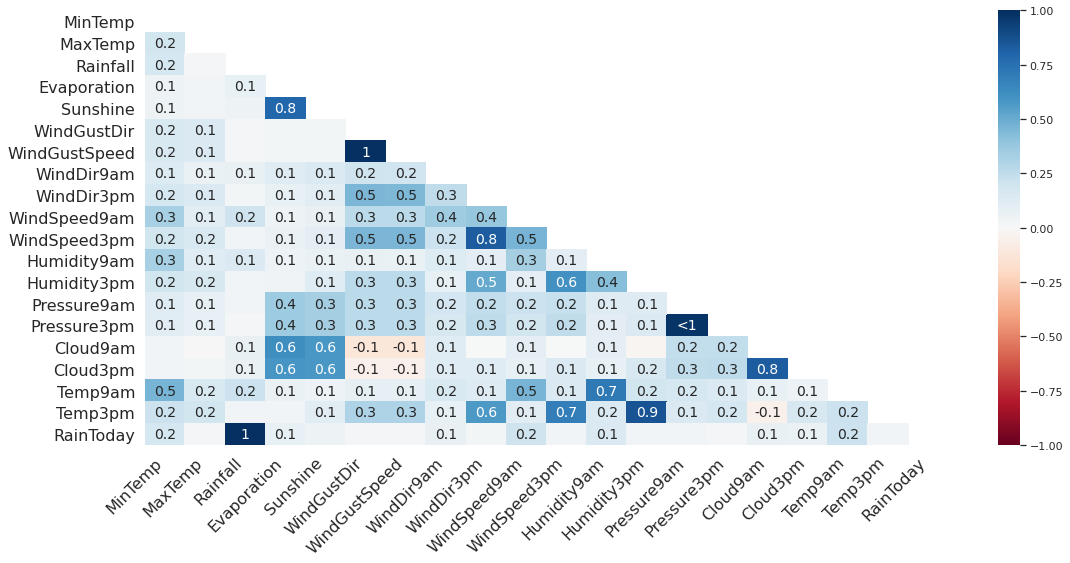

In [0]:
msno.heatmap(data, figsize=(18,8))
plt.show()

### List for low missing values

In [0]:
zero_missing_rate=list(data_info[data_info["Missing_Value_Rate"]==0].index)
low_missing_rate=list(data_info[(data_info['Missing_Value_Rate']>0)&(data_info['Missing_Value_Rate']<=0.05)].index)
low_missing_rate.remove("RainToday")
low_missing_rate,zero_missing_rate

(['WindDir3pm',
  'Humidity3pm',
  'Temp3pm',
  'WindSpeed3pm',
  'Humidity9am',
  'Rainfall',
  'WindSpeed9am',
  'Temp9am',
  'MinTemp',
  'MaxTemp'],
 ['Year', 'Month', 'Location', 'RainTomorrow', 'Day'])

### Simple Imputer for Low Missing Values

In [0]:
def simple_imputer(data,columns):
    
    for col in columns:
        total_nan=int(data[col].isnull().sum())
        
        if(col in categorical_columns):
            
            most_frequent_value=data[col].value_counts().index[0]
            data[col]=data[col].fillna(most_frequent_value)
            
            print("A total of {} Categorical variable {} have been imputed.".format(total_nan,col))
            
        else:
            mean=data[col].mean()
            std=data[col].std()
            
            random_normal=np.random.normal(loc=mean,scale=std,size=total_nan) 
            data[col][data[col].isnull()]=random_normal
            
            print("A total of {} Numerical variable {} have been imputed.".format(total_nan,col))

In [0]:
simple_imputer(x_train,low_missing_rate)

A total of 3023 Categorical variable WindDir3pm have been imputed.
A total of 2913 Numerical variable Humidity3pm have been imputed.
A total of 2206 Numerical variable Temp3pm have been imputed.
A total of 2109 Numerical variable WindSpeed3pm have been imputed.
A total of 1420 Numerical variable Humidity9am have been imputed.
A total of 1182 Numerical variable Rainfall have been imputed.
A total of 1083 Numerical variable WindSpeed9am have been imputed.
A total of 736 Numerical variable Temp9am have been imputed.
A total of 525 Numerical variable MinTemp have been imputed.
A total of 268 Numerical variable MaxTemp have been imputed.


In [0]:
simple_imputer(x_test,low_missing_rate)

A total of 755 Categorical variable WindDir3pm have been imputed.
A total of 697 Numerical variable Humidity3pm have been imputed.
A total of 520 Numerical variable Temp3pm have been imputed.
A total of 521 Numerical variable WindSpeed3pm have been imputed.
A total of 354 Numerical variable Humidity9am have been imputed.
A total of 224 Numerical variable Rainfall have been imputed.
A total of 265 Numerical variable WindSpeed9am have been imputed.
A total of 168 Numerical variable Temp9am have been imputed.
A total of 112 Numerical variable MinTemp have been imputed.
A total of 54 Numerical variable MaxTemp have been imputed.


In [0]:
Missing_Values(x_train[low_missing_rate])

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,WindDir3pm,113754,0,0.0,object,"[W, E, WNW, SSE, SW, NNW, N, NE, NW, SE, WSW, ...",16
1,Humidity3pm,113754,0,0.0,float64,"[68.0, 56.0, 63.0, 45.0, 52.0, 44.0, 67.0, 48....",3014
2,Temp3pm,113754,0,0.0,float64,"[14.3, 13.4, 24.0, 12.9, 20.6, 19.8, 13.8, 24....",2599
3,WindSpeed3pm,113754,0,0.0,float64,"[22.0, 28.0, 17.0, 35.0, 20.0, 9.0, 19.0, 37.0...",2132
4,Humidity9am,113754,0,0.0,float64,"[38.0, 91.0, 79.0, 52.0, 69.0, 72.0, 74.0, 85....",1504
5,Rainfall,113754,0,0.0,float64,"[0.0, 7.6, 0.2, 5.6, 3.4, 2.8, 0.4, 14.8, 15.4...",1320
6,WindSpeed9am,113754,0,0.0,float64,"[19.0, 15.0, 6.0, 30.0, 9.0, 4.0, 20.0, 7.0, 4...",1105
7,Temp9am,113754,0,0.0,float64,"[19.8, 11.1, 21.2, 18.8, 13.3, 9.4, 17.4, 27.0...",1110
8,MinTemp,113754,0,0.0,float64,"[15.1, 9.7, 13.2, 7.6, 12.9, 6.0, 7.2, 13.5, 1...",890
9,MaxTemp,113754,0,0.0,float64,"[23.9, 14.2, 25.4, 14.8, 22.2, 21.0, 15.9, 25....",682


###### Correlation of Rainfall and RainToday column missing values is 1. Column RainToday was Yes when the values in column Rainfall were greater than 1, and No when it was less than 1. Accordingly, a filling process will be made.

In [0]:
list1=pd.Series(x_train[x_train["RainToday"].isnull()]["Rainfall"])
list2=pd.Series(x_test[x_test["RainToday"].isnull()]["Rainfall"])

In [0]:
x_train["RainToday"].fillna(pd.Series(["Yes" if x>1 else "No" for x in list1],index=list1.index),inplace=True)

In [0]:
x_test["RainToday"].fillna(pd.Series(["Yes" if x>1 else "No" for x in list2],index=list2.index),inplace=True)

In [0]:
Missing_Values(x_train)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
5,Sunshine,113754,54345,0.478,float64,"[nan, 8.8, 7.0, 7.9, 2.1, 5.6, 10.1, 9.5, 3.5,...",146
4,Evaporation,113754,48791,0.429,float64,"[nan, 3.2, 4.0, 5.6, 2.0, 2.4, 5.4, 3.6, 1.8, ...",146
17,Cloud3pm,113754,45767,0.402,float64,"[nan, 5.0, 2.0, 7.0, 1.0, 8.0, 4.0, 6.0, 0.0, ...",11
16,Cloud9am,113754,43041,0.378,float64,"[nan, 6.0, 7.0, 8.0, 1.0, 3.0, 0.0, 2.0, 5.0, ...",10
15,Pressure3pm,113754,11225,0.099,float64,"[1002.4, 1007.7, 1021.5, 1001.4, 1021.2, 1011....",391
14,Pressure9am,113754,11257,0.099,float64,"[1001.9, 1008.2, 1025.2, 1004.6, 1023.0, 1011....",383
8,WindDir9am,113754,8036,0.071,object,"[NW, WNW, W, SW, WSW, NNE, NNW, ENE, N, S, SE,...",17
6,WindGustDir,113754,7458,0.066,object,"[SSW, WSW, ENE, WNW, S, SW, nan, NNE, SSE, NE,...",17
7,WindGustSpeed,113754,7406,0.065,float64,"[67.0, 50.0, 30.0, 91.875, 37.0, 39.0, nan, 26...",39
0,Location,113754,0,0.000,object,"[NorahHead, Walpole, Williamtown, Hobart, Bend...",49


### TargetEncoder was made for columns with empty and categorical values, considering 'NaN' as a variable.

In [0]:
def target_encoder(train,test,columns):
  for col in columns:
    encoder = TargetEncoder()
    train[col]=encoder.fit_transform(train[col],y_train)
    test[col]=encoder.transform(test[col])
    print(test.loc[:,[col]].isnull().sum())
    print(train.loc[:,[col]].isnull().sum())

In [0]:
target_encoder_cols = ["WindDir9am","WindGustDir"]
x_train_encoder=x_train.copy()
x_test_encoder=x_test.copy()
target_encoder(x_train_encoder,x_test_encoder,target_encoder_cols)

WindDir9am    0
dtype: int64
WindDir9am    0
dtype: int64
WindGustDir    0
dtype: int64
WindGustDir    0
dtype: int64


### We made Model based filling for other empty columns. These models were XGBoost and KNN. Continued with KNN, which provides the best performance.

In [0]:
data_info_2=Missing_Values(x_train_encoder)
model_based_list=list(data_info_2["Variable"][data_info_2["Missing_Value_Rate"]>0.06])
model_based_list

['Sunshine',
 'Evaporation',
 'Cloud3pm',
 'Cloud9am',
 'Pressure9am',
 'Pressure3pm',
 'WindGustSpeed']

In [0]:
from sklearn.impute import KNNImputer

In [0]:
knn_imputer=KNNImputer(n_neighbors=3)
x_test_mbi=x_test_encoder.copy()
x_train_mbi=x_train_encoder.copy()
for col in model_based_list:
    knn_imputer=KNNImputer(n_neighbors=3)  
    x_train_mbi[col] = knn_imputer.fit_transform(np.array(x_train_mbi[col]).reshape(-1,1),y_train)
    x_test_mbi[col] = knn_imputer.transform(np.array(x_test_mbi[col]).reshape(-1,1))
    print(x_test_mbi.loc[:,[col]].isnull().sum())
    print(x_train_mbi.loc[:,[col]].isnull().sum())

Sunshine    0
dtype: int64
Sunshine    0
dtype: int64
Evaporation    0
dtype: int64
Evaporation    0
dtype: int64
Cloud3pm    0
dtype: int64
Cloud3pm    0
dtype: int64
Cloud9am    0
dtype: int64
Cloud9am    0
dtype: int64
Pressure9am    0
dtype: int64
Pressure9am    0
dtype: int64
Pressure3pm    0
dtype: int64
Pressure3pm    0
dtype: int64
WindGustSpeed    0
dtype: int64
WindGustSpeed    0
dtype: int64


In [0]:
Missing_Values(x_train_mbi)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,Location,113754,0,0.0,object,"[NorahHead, Walpole, Williamtown, Hobart, Bend...",49
1,MinTemp,113754,0,0.0,float64,"[15.1, 9.7, 13.2, 7.6, 12.9, 6.0, 7.2, 13.5, 1...",890
22,Month,113754,0,0.0,int64,"[10, 9, 4, 7, 12, 6, 11, 2, 8, 1, 5, 3]",12
21,Year,113754,0,0.0,int64,"[2009, 2011, 2010, 2015, 2012, 2013, 2016, 200...",11
20,RainToday,113754,0,0.0,object,"[No, Yes]",2
19,Temp3pm,113754,0,0.0,float64,"[14.3, 13.4, 24.0, 12.9, 20.6, 19.8, 13.8, 24....",2599
18,Temp9am,113754,0,0.0,float64,"[19.8, 11.1, 21.2, 18.8, 13.3, 9.4, 17.4, 27.0...",1110
17,Cloud3pm,113754,0,0.0,float64,"[4.5004780325650495, 5.0, 2.0, 7.0, 1.0, 8.0, ...",11
16,Cloud9am,113754,0,0.0,float64,"[4.433187674119328, 6.0, 7.0, 8.0, 1.0, 3.0, 0...",10
15,Pressure3pm,113754,0,0.0,float64,"[1002.4, 1007.7, 1021.5, 1001.4, 1021.2, 1011....",391


### Since our models could not train categorical variables, they were converted to numerical value with LabelEncoder.


In [0]:
def Label_Encoder(df,columns,train_or_test):
    for col in columns:
        le = LabelEncoder()
        if(train_or_test == "test"):

            le.fit(x_train_mbi[col].copy().astype(str))
            df[col] = le.transform(df[col].copy().astype(str))

        else:
            df[col] = le.fit_transform(df[col].copy().astype(str))
    return df

In [0]:
x_test_mbi = Label_Encoder(x_test_mbi,["Location","RainToday","WindDir3pm"],"test")  

In [0]:
x_train_mbi = Label_Encoder(x_train_mbi,["Location","RainToday","WindDir3pm"],"train")


# 5. Modelling

In [0]:
before_importance_scores=pd.DataFrame(columns=["scores"])

## XGBoost Classifier

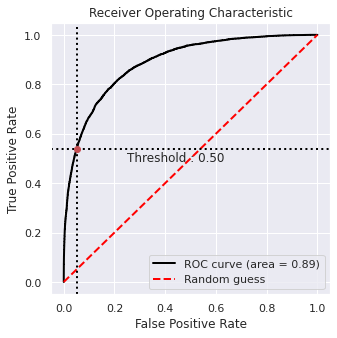

In [0]:
from sklearn import metrics
xgb_model = xgb.XGBClassifier(n_estimators=150,random_state=0,learning_rate=0.1,eta=0.4,booster="gbtree",base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        max_depth=6,min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785)

xgb_model.fit(x_train_mbi, y_train)
y_pred = xgb_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
before_importance_scores.loc["XGboost Classifier"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Lightm-GBM Classifier

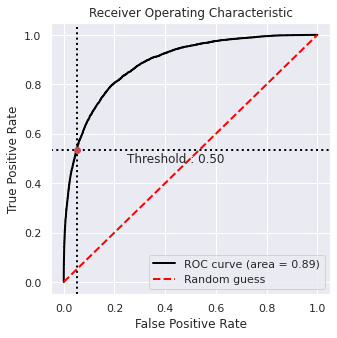

In [0]:
lgbm_model = lgb.LGBMClassifier(min_child_samples=25,n_estimators=150,subsample=0.11,boosting_type="dart",learning_rate=0.25)

lgbm_model.fit(x_train_mbi, y_train)
y_pred = lgbm_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
before_importance_scores.loc["LGBM Classifier"]=roc_auc


bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## CatBoost Classifier

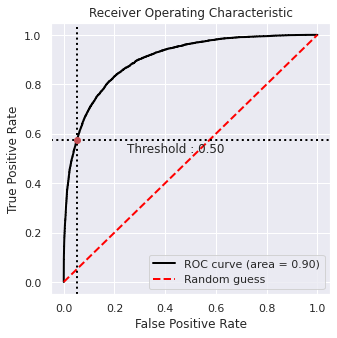

In [0]:
cat_model = CatBoostClassifier(depth=10,max_bin=60,bagging_temperature= 0.2,random_strength=5)

cat_model.fit(x_train_mbi, y_train,verbose=False)
y_pred = cat_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
before_importance_scores.loc["CatBoost Classifier"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## GradientBoosting Classifier

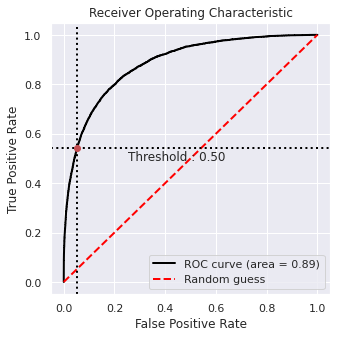

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                                   max_depth=7, random_state=0)

gradient_model.fit(x_train_mbi, y_train)
y_pred = gradient_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
before_importance_scores.loc["GradientBoosting Classifier"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regression

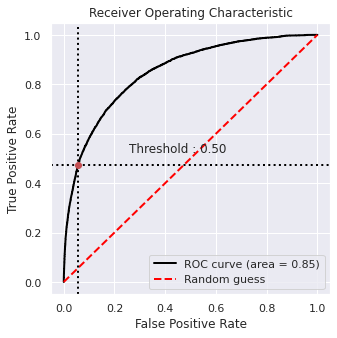

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(C= 0.1, solver= 'liblinear',class_weight={1: 0.5, 0: 0.5},penalty="l1")

log_reg_model.fit(x_train_mbi, y_train)
y_pred = log_reg_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]


fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
before_importance_scores.loc["Logistic Regression"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Visualization before feature importance

In [0]:
import plotly.express as px
fig = px.bar(before_importance_scores, x=before_importance_scores.index, y='scores',height=400,width=900,text=round(before_importance_scores.scores,3),title="Visualization before feature importance")
fig.update_traces(marker_color='rgb(158,20,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

![](https://cdn.discordapp.com/attachments/703002285994672192/716668021233680394/before.png)



# 6. Feature Importance

<Figure size 432x288 with 0 Axes>

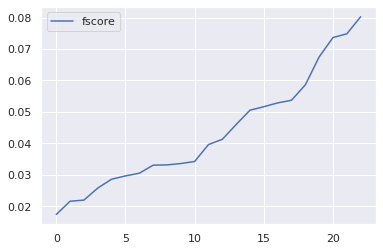

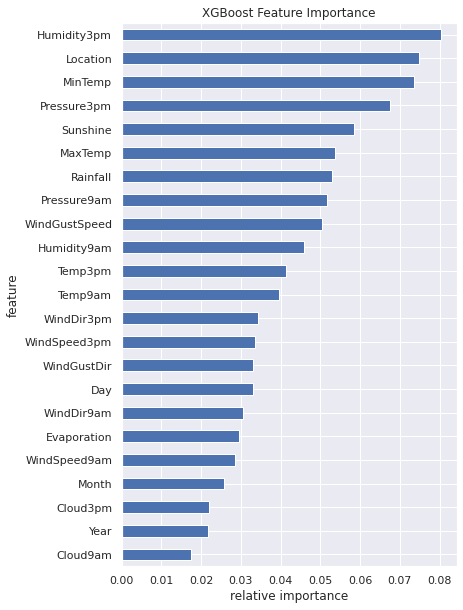

In [0]:
import operator
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000

dtrain = xgb.DMatrix(x_train_mbi, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

In [0]:
lst=list(df["feature"][df["fscore"]<0.03])
lst

['Cloud9am', 'Year', 'Cloud3pm', 'Month', 'WindSpeed9am', 'Evaporation']

In [0]:
x_train_importance=x_train_mbi.drop(lst,axis=1)
x_test_importance=x_test_mbi.drop(lst,axis=1)

## Modelling after feature importance

In [0]:
after_importance_scores=pd.DataFrame(columns=["scores"])

## XGBoost Classifier

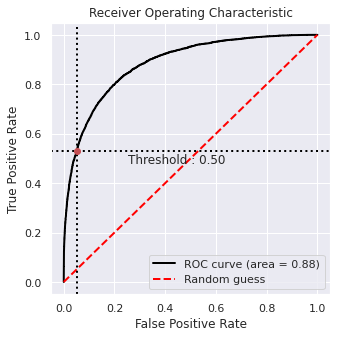

In [0]:
xgb_model = xgb.XGBClassifier(n_estimators=150,random_state=0,learning_rate=0.1,eta=0.4,booster="gbtree",base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        max_depth=6,min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785)

xgb_model.fit(x_train_importance, y_train)
y_pred = xgb_model.predict_proba(x_test_importance)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
after_importance_scores.loc["XGboost Classifier"]=roc_auc


bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Light-GBM Classifier

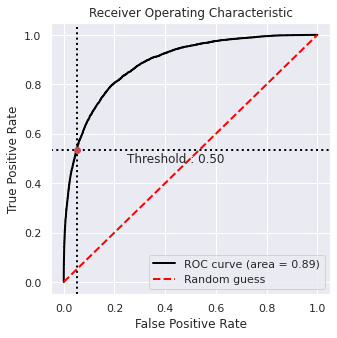

In [0]:
lgbm_model = lgb.LGBMClassifier(min_child_samples=25,n_estimators=150,subsample=0.11,boosting_type="dart",learning_rate=0.25)

lgbm_model.fit(x_train_mbi, y_train)
y_pred = lgbm_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
after_importance_scores.loc["LGBM Classifier"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## CatBoost Classifier

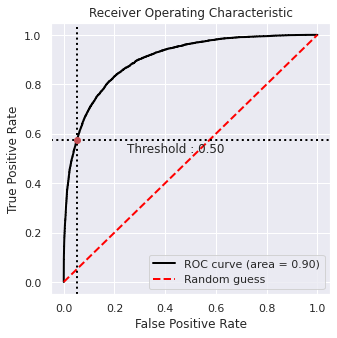

In [0]:
cat_model = CatBoostClassifier(depth=10,max_bin=60,bagging_temperature= 0.2,random_strength=5)

cat_model.fit(x_train_mbi, y_train,verbose=False)
y_pred = cat_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
after_importance_scores.loc["CatBoost Classifier"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## GradientBoosting Classifier

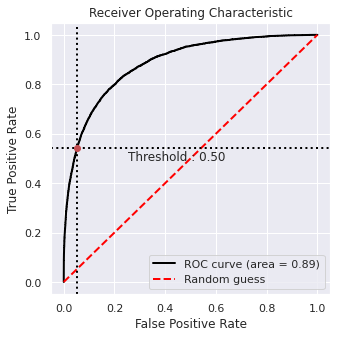

In [0]:
gradient_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                                   max_depth=7, random_state=0)

gradient_model.fit(x_train_mbi, y_train)
y_pred = gradient_model.predict_proba(x_test_mbi)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
after_importance_scores.loc["GradientBoosting Classifier"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regression

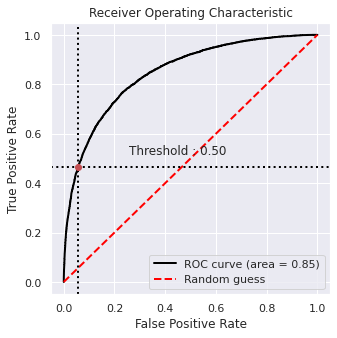

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(C= 0.1, solver= 'liblinear',class_weight={1: 0.5, 0: 0.5},penalty="l1")

log_reg_model.fit(x_train_importance, y_train)
y_pred = log_reg_model.predict_proba(x_test_importance)
y_pred = y_pred[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
after_importance_scores.loc["Logistic Regression"]=roc_auc

bc = BinaryClassification(y_test, y_pred, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Visualization after feature importance


In [0]:
import plotly.express as px
fig = px.bar(after_importance_scores, x=before_importance_scores.index, y='scores',height=400,width=900,text=round(after_importance_scores.scores,3),title="Visualization after feature importance")
fig.update_traces(marker_color='rgb(158,20,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

![](https://cdn.discordapp.com/attachments/703002285994672192/716668019140460584/after.png)

# 7.Predict results

## Visualization for After Feature Importance and Before Feature Importance


In [0]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=before_importance_scores.index,
    y=before_importance_scores.scores,
    name='Before Importance',text=round(before_importance_scores.scores,3),textposition='auto',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=after_importance_scores.index,
    y=after_importance_scores.scores,
    name="After Importance",text=round(after_importance_scores.scores,3),textposition='auto',
    marker_color='pink'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,title="Visualization for After Feature Importance and Before Feature Importance")
fig.show()

![](https://cdn.discordapp.com/attachments/703002285994672192/716668024374951977/vs.png)